32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 211ms/step
Epoch 1/3
32/32 - 71s - 2s/step - accuracy: 0.8920 - loss: 0.3563
Epoch 2/3
32/32 - 6s - 183ms/step - accuracy: 0.9800 - loss: 0.0651
Epoch 3/3
32/32 - 10s - 323ms/step - accuracy: 0.9825 - loss: 0.0631
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step


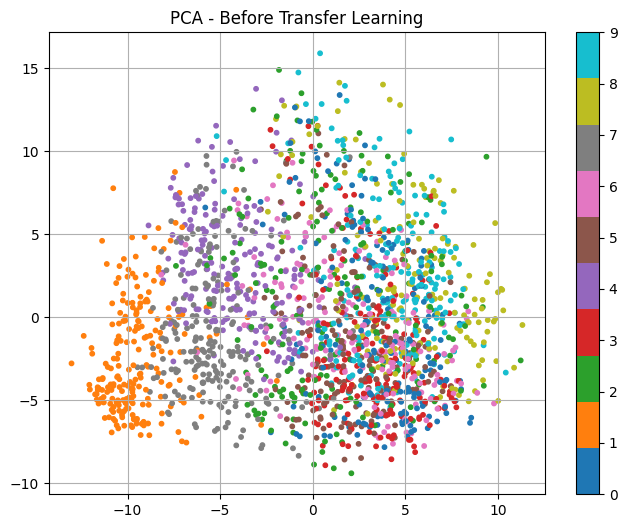

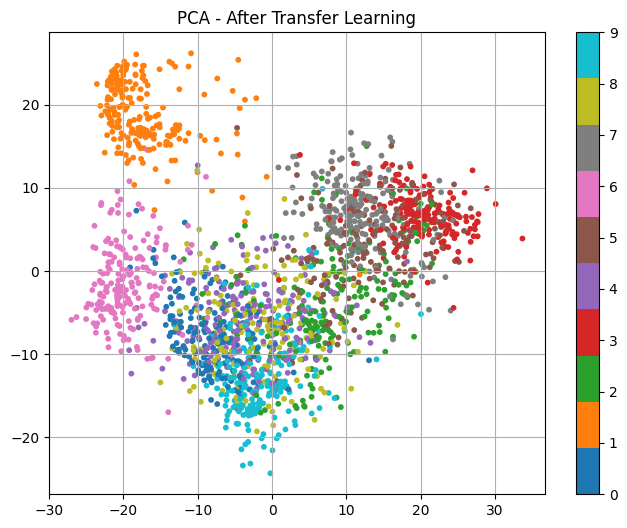

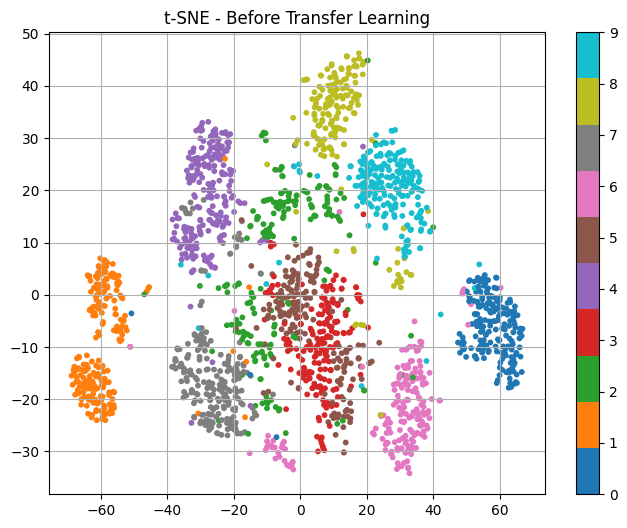

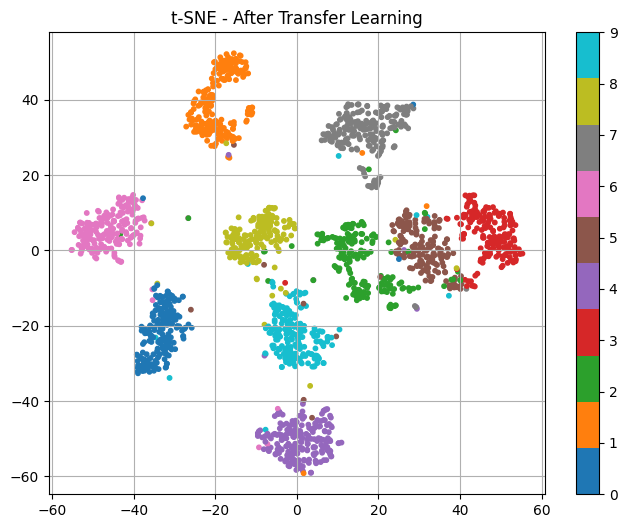

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


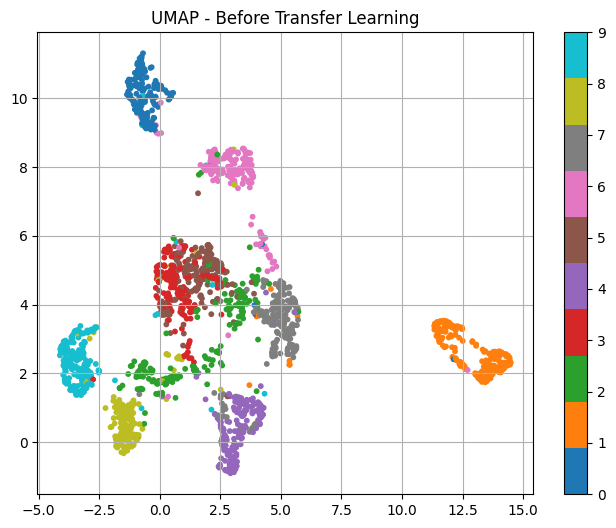

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


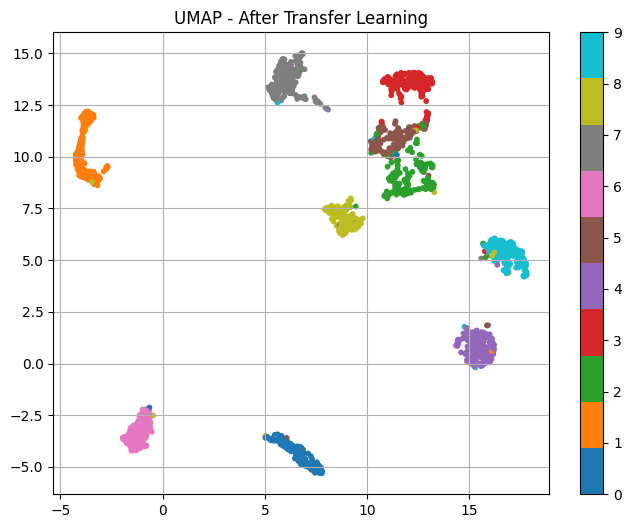

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

(x_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:2000]
y_train = y_train[:2000]

x_train = np.stack([x_train]*3, axis=-1)
x_train = tf.image.resize(x_train, (224, 224)).numpy() / 255.0
y_cat = to_categorical(y_train, 10)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
feature_model = Model(inputs=base_model.input, outputs=GlobalAveragePooling2D()(base_model.output))
features_before = feature_model.predict(x_train, batch_size=64)

x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(10, activation='softmax')(x)
model_tl = Model(inputs=base_model.input, outputs=output)

model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_tl.fit(x_train, y_cat, epochs=3, batch_size=64, verbose=2)

model_ft = Model(inputs=model_tl.input, outputs=model_tl.layers[-2].output)
features_after = model_ft.predict(x_train, batch_size=64)

def plot_embedding(method, features, labels, title):
    reducer = method(n_components=2)
    reduced = reducer.fit_transform(features)
    plt.figure(figsize=(8,6))
    scatter = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_embedding(PCA, features_before, y_train, "PCA - Before Transfer Learning")
plot_embedding(PCA, features_after, y_train, "PCA - After Transfer Learning")

plot_embedding(TSNE, features_before, y_train, "t-SNE - Before Transfer Learning")
plot_embedding(TSNE, features_after, y_train, "t-SNE - After Transfer Learning")

plot_embedding(umap.UMAP, features_before, y_train, "UMAP - Before Transfer Learning")
plot_embedding(umap.UMAP, features_after, y_train, "UMAP - After Transfer Learning")
